In [6]:
%autoreload 2

from VMTest import *

In [135]:
database_name = 'allEdges'
completed = checkCompleted(database_name)

In [ ]:
charCounts = []
for char in completed:
    print(char)
    df = loadSQL(char, database_name, index_col='index')
    authorCounts = df.groupby('subreddit')['author'].count()
    authorCounts.name = char
    charCounts.append(authorCounts)
    
len(charCounts)

In [112]:
totals = pd.concat(charCounts, axis=1)
totals.index.name = 'subreddit'

In [113]:
totals['TOTAL'] = totals.sum(axis=1)

In [136]:
totals.sort_values('TOTAL', ascending=False, inplace=True)
totals.head()

,a,b,c,d,e,f,g,h,i,j,...,1,2,3,4,5,6,7,8,9,TOTAL
subreddit,,,,,,,,,,,,,,,,,,,,,
AskReddit,41824.0,43153.0,45064.0,42225.0,18620.0,24205.0,24280.0,22300.0,24027.0,28337.0,...,2009.0,1210.0,767.0,852.0,537.0,448.0,445.0,486.0,424.0,709096.0
funny,12194.0,13230.0,13612.0,13508.0,5593.0,7398.0,7474.0,6706.0,7269.0,8764.0,...,616.0,359.0,232.0,261.0,151.0,141.0,142.0,162.0,126.0,215223.0
pics,11959.0,13068.0,13050.0,12791.0,5445.0,7405.0,7243.0,6696.0,7134.0,8505.0,...,616.0,393.0,224.0,254.0,181.0,132.0,131.0,146.0,150.0,208222.0
gaming,11672.0,11785.0,12444.0,13064.0,5152.0,6898.0,7195.0,6180.0,6508.0,8030.0,...,506.0,288.0,194.0,214.0,131.0,106.0,107.0,114.0,95.0,201434.0
todayilearned,9770.0,10557.0,10875.0,10507.0,4503.0,5986.0,5966.0,5521.0,5911.0,6746.0,...,504.0,294.0,199.0,223.0,136.0,109.0,104.0,140.0,112.0,170856.0


In [115]:
totals['TOTAL'].describe()

count    106687.000000
mean        171.664842
std        3103.355680
min           1.000000
25%           1.000000
50%           2.000000
75%          13.000000
max      709096.000000
Name: TOTAL, dtype: float64

In [116]:
n = totals['TOTAL']

In [118]:
p = n.cumsum()/n.sum()

In [119]:
p[p<0.25].shape

(53,)

In [120]:
p[p<0.40].shape

(175,)

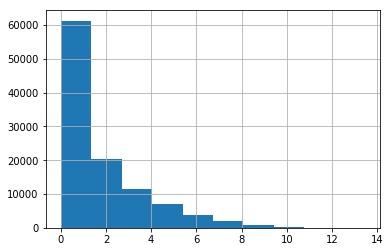

In [121]:
np.log(n).hist()

In [122]:
defaults = loadSQL('defaults','reference')
defaults = defaults.defaults.unique()

In [123]:
'Art' in defaults

True

In [126]:
n = n.reset_index()

In [137]:
d = n[n['subreddit'].isin(defaults)].reset_index()
d.head()

,index,subreddit,TOTAL
0,0,AskReddit,709096.0
1,1,funny,215223.0
2,2,pics,208222.0
3,3,gaming,201434.0
4,4,todayilearned,170856.0


In [138]:
database_name = 'allEdges'
completed = checkCompleted(database_name)

engine = get_engine(database_name)

'a'

In [151]:
dfs = []
for char in completed:
    print(char)
    query = """
    SELECT author, subreddit, weight FROM '{0}'
    WHERE (author in
                (SELECT author FROM '{0}'
                WHERE (subreddit == 'changemyview') and
                        (weight > 2)))
        and (weight > 2)
    """.format(char)
    
    data = pd.read_sql_query(query, engine)
    dfs.append(data)

a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z
0
1
2
3
4
5
6
7
8
9


In [152]:
cmv = pd.concat(dfs)
cmv.head()

,author,subreddit,weight
0,AutoModerator,onewordeach,52
1,AutoModerator,ModelNortheastChamber,31
2,alea6,CasualConversation,20
3,AutoModerator,KotakuInAction,335
4,AutoModerator,OldManDog,81


In [ ]:
cmv = pd.concat